In [1]:
import pyreadstat
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_parquet("PISA_2022.parquet")

In [3]:
column_rename_map = {
    'ST297Q01JA': 'one-on-one',
    'ST297Q03JA': 'ICT',
    'ST297Q05JA': 'video',
    'ST297Q06JA': 'small_group',
    'ST297Q07JA': 'large_group',
    'ST297Q09JA': 'none',
    'ST004D01T': 'gender',
}

# Renaming the columns
df.rename(columns=column_rename_map, inplace=True)

In [4]:
columns_for_clustering = ["one-on-one", "ICT", "video", "small_group", "large_group", "none","gender"]
X = df[columns_for_clustering]

In [7]:
X = X.apply(pd.to_numeric, errors='coerce')

# Drop rows with NaN values if any conversion failed
X.dropna(inplace=True)

# Calculate the number of occurrences of the values 1 and 2 in the "spol" column
num_value_1 = df['gender'].value_counts().get(1, 0)
num_value_2 = df['gender'].value_counts().get(2, 0)

# Calculate the percentage of occurrences of the values 1 and 2 in the "spol" column
percentage_value_1 = (num_value_1 / len(df)) * 100
percentage_value_2 = (num_value_2 / len(df)) * 100

# Print the results
print(f"Number of occurrences of value 1 in 'spol': {num_value_1}")
print(f"Percentage of occurrences of value 1 in 'spol': {percentage_value_1:.2f}%")
print(f"Number of occurrences of value 2 in 'spol': {num_value_2}")
print(f"Percentage of occurrences of value 2 in 'spol': {percentage_value_2:.2f}%")

Number of occurrences of value 1 in 'spol': 305759
Percentage of occurrences of value 1 in 'spol': 49.82%
Number of occurrences of value 2 in 'spol': 307906
Percentage of occurrences of value 2 in 'spol': 50.17%


In [8]:
X.head()

,one-on-one,ICT,video,small_group,large_group,none,gender
0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,2.0
2,0.0,0.0,0.0,0.0,1.0,0.0,2.0
3,1.0,0.0,1.0,0.0,0.0,0.0,1.0
4,1.0,0.0,0.0,0.0,1.0,0.0,1.0


In [10]:
melted_df = X.melt(id_vars='gender', value_vars=['one-on-one', 'ICT', 'video', 'small_group', 'large_group', 'none'],
                            var_name='method', value_name='selected')
# Filter for selected methods (where selected == 1.0)
count_df = melted_df[melted_df['selected'] == 1.0]

# Count occurrences for each method by gender
method_count = count_df.groupby(['gender', 'method']).size().unstack(fill_value=0)

# Display the results
print("Count of method selections by gender:")
print(method_count)

Count of method selections by gender:
method    ICT  large_group    none  one-on-one  small_group  video
gender                                                            
1.0     64911        36359  123447       70268        62381  64754
2.0     68640        51371  130423       74804        68455  64787


In [ ]:
X_cluster = X.drop(columns=['gender'])

In [ ]:
#X = X.apply(pd.to_numeric, errors='coerce')
#X.dropna(inplace=True)

In [ ]:
X_cluster.dropna(inplace=True)

In [ ]:
X_cluster.head()

,one-on-one,ICT,video,small_group,large_group,none
0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0
3,1.0,0.0,1.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

         one-on-one       ICT     video  small_group  large_group      none
Cluster                                                                    
0          0.143845  0.018563  0.018784     0.121390     0.065673  0.524198
1          0.865406  0.833276  0.853376     0.930263     0.925747  0.706407
2          0.340039  0.677128  0.634995     0.270669     0.105128  0.031161


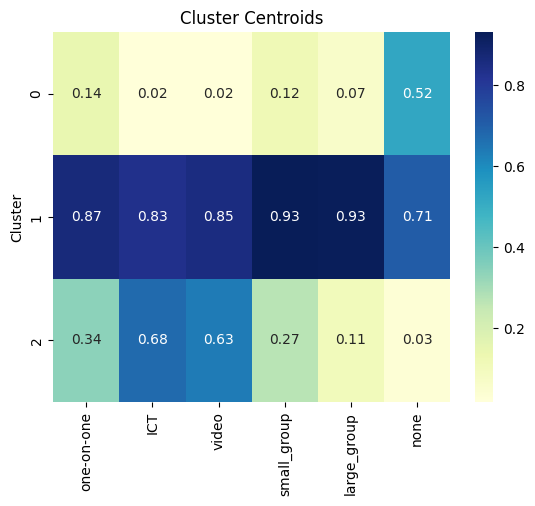

In [ ]:
# Perform K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)  # Adjust the number of clusters as needed
kmeans.fit(X_cluster)
clusters = kmeans.labels_
X_cluster['Cluster'] = clusters
#X['Cluster'] = clusters
# Viewing the mean values of each cluster
cluster_means = X_cluster.groupby('Cluster').mean()
print(cluster_means)
import seaborn as sns
# Heatmap of the cluster centroids
sns.heatmap(cluster_means, annot=True, cmap="YlGnBu", fmt=".2f")
plt.title('Cluster Centroids')
plt.show()

In [ ]:
X = X.dropna(subset=['one-on-one', 'ICT', 'video', 'small_group', 'large_group', 'none'])
X[['one-on-one', 'ICT', 'video', 'small_group', 'large_group', 'none']] = X[['one-on-one', 'ICT', 'video', 'small_group', 'large_group', 'none']].apply(pd.to_numeric, errors='coerce')
X.head()

,one-on-one,ICT,video,small_group,large_group,none,gender
0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,2.0
2,0.0,0.0,0.0,0.0,1.0,0.0,2.0
3,1.0,0.0,1.0,0.0,0.0,0.0,1.0
4,1.0,0.0,0.0,0.0,1.0,0.0,1.0


In [14]:

from scipy.stats import chi2_contingency
df['method'] = df[['one-on-one', 'ICT', 'video', 'small_group', 'large_group', 'none']].idxmax(axis=1)

# Create a contingency table
contingency_table = pd.crosstab(df['gender'], df['method'])

# Display the contingency table
print("Contingency Table:")
print(contingency_table)

# Perform Chi-Square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Output the results
print("\nChi2 Statistic:", chi2)
print("P-Value:", p)

# Interpretation
alpha = 0.05
if p < alpha:
    print("Reject the null hypothesis: There is a significant association between gender and method preference.")
else:
    print("Fail to reject the null hypothesis: No significant association found.")


C:\Users\borbr\AppData\Local\Temp\ipykernel_4064\2926960967.py:2: FutureWarning: The behavior of DataFrame.idxmax with all-NA values, or any-NA and skipna=False, is deprecated. In a future version this will raise ValueError
  df['method'] = df[['one-on-one', 'ICT', 'video', 'small_group', 'large_group', 'none']].idxmax(axis=1)


Contingency Table:
method    ICT  large_group   none  one-on-one  small_group  video
gender                                                           
1.0     35855         8712  97414      108421        19167  20346
2.0     29253         8657  91046      131189        16689  15085

Chi2 Statistic: 3993.8171359618354
P-Value: 0.0
Reject the null hypothesis: There is a significant association between gender and method preference.


In [40]:
X['Cluster'] = clusters

In [41]:
X.head()

,one-on-one,ICT,video,small_group,large_group,none,gender,Cluster
0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0
1,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0
2,0.0,0.0,0.0,0.0,1.0,0.0,2.0,0
3,1.0,0.0,1.0,0.0,0.0,0.0,1.0,2
4,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0


In [42]:
from scipy.stats import chi2_contingency
contingency_table = pd.crosstab(X['Cluster'], X['gender'])

print("Contingency Table:")
print(contingency_table)

# Perform the chi-square test of independence
chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f"\nChi-square test statistic: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of freedom: {dof}")
print(f"Expected frequencies:\n{expected}")

# Interpretation of the p-value
alpha = 0.05
if p < alpha:
    print("Reject the null hypothesis: There is a significant association between gender and cluster membership.")
else:
    print("Fail to reject the null hypothesis: There is no significant association between gender and cluster membership.")

Contingency Table:
gender      1.0     2.0
Cluster                
0        201391  205550
1         18496   33541
2         69398   52636

Chi-square test statistic: 6684.535689342426
P-value: 0.0
Degrees of freedom: 2
Expected frequencies:
[[202615.31118979 204325.68881021]
 [ 25909.14395056  26127.85604944]
 [ 60760.54485966  61273.45514034]]
Reject the null hypothesis: There is a significant association between gender and cluster membership.
